# Autoencoders

Autoencoders are the fundamentals architecture of the generative modeling in deep learning. The idea behind the architecture is to use CNN to capture the best features from the image and put it into a latent space and then to reconstruct the image as closely as the original image. 

In Autoencoders we do not predict a determistic conclusion but we rather predict a stochastic conclusion of an unseen image with the provided input. 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/My\ Drive/GDL_code

/content/drive/My Drive/GDL_code


In [3]:
import os

from utils.loaders import load_mnist
from models.AE import Autoencoder

Using TensorFlow backend.


In [4]:
from models.AntonAE import Autoencoder

Model imported.


## Set parameters

In [0]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

## Load the data

In [0]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## Define the structure of the neural network

In [7]:
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [8]:
AE.encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0   

In [9]:
AE.decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0   

## Train the autoencoder

In [0]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [11]:
AE.compile(LEARNING_RATE)

In [12]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)




Epoch 1/200





 320/1000 [========>.....................] - ETA: 23s - loss: 0.2283

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.106258). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 12s 12ms/step - loss: 0.1838

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 2/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0866

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.330516). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.166275). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 930us/step - loss: 0.0772

Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 3/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0677

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.264230). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.133284). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 843us/step - loss: 0.0660

Epoch 00003: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 4/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0618

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.309814). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155852). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 899us/step - loss: 0.0598

Epoch 00004: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 5/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0571

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.287138). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144452). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 873us/step - loss: 0.0568

Epoch 00005: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 6/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0571

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.413449). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207487). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 996us/step - loss: 0.0556

Epoch 00006: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 7/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0530

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.316130). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.158869). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 895us/step - loss: 0.0547

Epoch 00007: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 8/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0531

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.302836). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.152413). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 870us/step - loss: 0.0539

Epoch 00008: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 9/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0539

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.290750). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.146058). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 872us/step - loss: 0.0534

Epoch 00009: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 10/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0532

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.308665). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.157352). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 887us/step - loss: 0.0527

Epoch 00010: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 11/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0517

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.272038). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136644). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 847us/step - loss: 0.0523

Epoch 00011: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 12/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0526

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.335263). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168335). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 897us/step - loss: 0.0519

Epoch 00012: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 13/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0520

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.353895). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177727). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 934us/step - loss: 0.0515

Epoch 00013: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 14/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0506

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.324202). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163129). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 898us/step - loss: 0.0511

Epoch 00014: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 15/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0507

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.465535). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.235265). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0507

Epoch 00015: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 16/200
 384/1000 [==========>...................] - ETA: 1s - loss: 0.0498

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.427832). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.216812). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 982us/step - loss: 0.0506

Epoch 00016: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 17/200
 384/1000 [==========>...................] - ETA: 1s - loss: 0.0503

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.441082). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.221311). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 975us/step - loss: 0.0503

Epoch 00017: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 18/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0507

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.279180). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140262). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 833us/step - loss: 0.0498

Epoch 00018: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 19/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0494

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.325809). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163779). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 868us/step - loss: 0.0500

Epoch 00019: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 20/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0492

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.577667). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.289828). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0495

Epoch 00020: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 21/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0480

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.299225). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150405). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 832us/step - loss: 0.0493

Epoch 00021: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 22/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0502

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.400216). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.200884). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 971us/step - loss: 0.0490

Epoch 00022: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 23/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0500

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.307887). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155009). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0491

Epoch 00023: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 24/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0506

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.287245). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144546). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 826us/step - loss: 0.0486

Epoch 00024: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 25/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0500

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.341475). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171612). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 901us/step - loss: 0.0483

Epoch 00025: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 26/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0488

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.327471). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.164671). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 876us/step - loss: 0.0482

Epoch 00026: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 27/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0485

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.285416). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143395). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 830us/step - loss: 0.0479

Epoch 00027: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 28/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0481

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.350424). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180189). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 928us/step - loss: 0.0477

Epoch 00028: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 29/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0457

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.341085). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171375). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 906us/step - loss: 0.0475

Epoch 00029: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 30/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0462

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.395624). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.198868). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 964us/step - loss: 0.0473

Epoch 00030: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 31/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0470

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.354980). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178417). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 905us/step - loss: 0.0471

Epoch 00031: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 32/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0468

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.270432). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136246). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 808us/step - loss: 0.0469

Epoch 00032: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 33/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0468

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.249512). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.125624). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 793us/step - loss: 0.0466

Epoch 00033: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 34/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0462

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.304032). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.152697). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 821us/step - loss: 0.0466

Epoch 00034: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 35/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0457

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.272100). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136975). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 805us/step - loss: 0.0462

Epoch 00035: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 36/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0460

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.354458). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177796). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 868us/step - loss: 0.0460

Epoch 00036: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 37/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0463

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.308707). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155078). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 832us/step - loss: 0.0462

Epoch 00037: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 38/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0452

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.295774). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148949). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 803us/step - loss: 0.0456

Epoch 00038: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 39/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0454

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.328835). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.165298). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 846us/step - loss: 0.0454

Epoch 00039: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 40/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0458

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.319434). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.160497). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 861us/step - loss: 0.0452

Epoch 00040: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 41/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0438

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.285761). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143763). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 823us/step - loss: 0.0451

Epoch 00041: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 42/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0450

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.268669). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135176). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 784us/step - loss: 0.0453

Epoch 00042: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 43/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0445

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334706). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168296). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0448

Epoch 00043: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 44/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0454

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.276251). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138878). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 776us/step - loss: 0.0449

Epoch 00044: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 45/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0444

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.335780). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168842). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 884us/step - loss: 0.0444

Epoch 00045: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 46/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0450

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.300768). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151273). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0444

Epoch 00046: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 47/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0433

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.287378). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144400). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 829us/step - loss: 0.0442

Epoch 00047: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 48/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0444

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.335907). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168660). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 867us/step - loss: 0.0439

Epoch 00048: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 49/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0425

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.359327). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180314). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 866us/step - loss: 0.0438

Epoch 00049: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 50/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0428

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.297122). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149638). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 833us/step - loss: 0.0437

Epoch 00050: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 51/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0427

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.285481). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143377). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 794us/step - loss: 0.0438

Epoch 00051: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 52/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.269834). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135799). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 799us/step - loss: 0.0433

Epoch 00052: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 53/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0424

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.277786). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140092). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 800us/step - loss: 0.0431

Epoch 00053: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 54/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0421

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.437779). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.219568). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 951us/step - loss: 0.0428

Epoch 00054: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 55/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0423

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.285462). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143859). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 799us/step - loss: 0.0427

Epoch 00055: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 56/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0430

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.256905). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.129255). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 759us/step - loss: 0.0427

Epoch 00056: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 57/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0425

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.298106). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149858). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 823us/step - loss: 0.0429

Epoch 00057: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 58/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0432

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.305477). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.153970). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 825us/step - loss: 0.0425

Epoch 00058: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 59/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0421

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.301404). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151471). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 819us/step - loss: 0.0425

Epoch 00059: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 60/200
 384/1000 [==========>...................] - ETA: 1s - loss: 0.0424

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.424494). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.213338). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 946us/step - loss: 0.0422

Epoch 00060: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 61/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0411

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.292232). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.146983). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 819us/step - loss: 0.0417

Epoch 00061: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 62/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0422

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.489408). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.245661). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0416

Epoch 00062: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 63/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0413

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.301656). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151359). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 853us/step - loss: 0.0418

Epoch 00063: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 64/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0414

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.263248). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.132305). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 768us/step - loss: 0.0416

Epoch 00064: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 65/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0406

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.319238). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.160612). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 860us/step - loss: 0.0414

Epoch 00065: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 66/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0419

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.289155). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.145231). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 816us/step - loss: 0.0413

Epoch 00066: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 67/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0407

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.329195). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.165330). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 866us/step - loss: 0.0414

Epoch 00067: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 68/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0417

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.291880). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.146638). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 812us/step - loss: 0.0412

Epoch 00068: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 69/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0397

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.264642). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.133855). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 769us/step - loss: 0.0410

Epoch 00069: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 70/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0397

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.280430). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.141047). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 832us/step - loss: 0.0408

Epoch 00070: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 71/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0400

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.309114). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155347). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 836us/step - loss: 0.0409

Epoch 00071: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 72/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.268924). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135423). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 784us/step - loss: 0.0410

Epoch 00072: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 73/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.281514). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.141680). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 810us/step - loss: 0.0406

Epoch 00073: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 74/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0406

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.297932). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149786). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 816us/step - loss: 0.0403

Epoch 00074: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 75/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0407

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.294143). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147959). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 816us/step - loss: 0.0406

Epoch 00075: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 76/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0398

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.283684). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.142860). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 816us/step - loss: 0.0402

Epoch 00076: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 77/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.280145). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140769). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 808us/step - loss: 0.0400

Epoch 00077: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 78/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0405

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.278399). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.139894). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 776us/step - loss: 0.0401

Epoch 00078: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 79/200
 416/1000 [===========>..................] - ETA: 1s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.686684). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.343900). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0401

Epoch 00079: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 80/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0396

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.416063). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208802). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 938us/step - loss: 0.0401

Epoch 00080: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 81/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.413220). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207508). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 919us/step - loss: 0.0396

Epoch 00081: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 82/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0393

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.351977). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176698). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 850us/step - loss: 0.0394

Epoch 00082: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 83/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0398

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.285347). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143311). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 811us/step - loss: 0.0398

Epoch 00083: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 84/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0393

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.301072). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151834). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 839us/step - loss: 0.0395

Epoch 00084: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 85/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0398

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.373125). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187451). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 885us/step - loss: 0.0396

Epoch 00085: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 86/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0399

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.299786). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150543). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 811us/step - loss: 0.0390

Epoch 00086: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 87/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0395

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.299881). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151642). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 813us/step - loss: 0.0391

Epoch 00087: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 88/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0380

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.282432). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.141980). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 796us/step - loss: 0.0396

Epoch 00088: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 89/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0390

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.256886). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.130760). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 780us/step - loss: 0.0392

Epoch 00089: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 90/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0392

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.378309). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.189865). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 887us/step - loss: 0.0391

Epoch 00090: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 91/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0389

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.278188). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143104). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0389

Epoch 00091: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 92/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0386

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.256598). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.129765). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 788us/step - loss: 0.0391

Epoch 00092: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 93/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0386

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.487137). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.244680). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0389

Epoch 00093: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 94/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0394

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.361002). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181697). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 934us/step - loss: 0.0386

Epoch 00094: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 95/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0384

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.277276). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.139625). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 916us/step - loss: 0.0387

Epoch 00095: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 96/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0387

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.489317). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.247098). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0386

Epoch 00096: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 97/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0395

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.265427). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.133777). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 846us/step - loss: 0.0386

Epoch 00097: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 98/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0393

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.331067). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.166670). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 929us/step - loss: 0.0383

Epoch 00098: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 99/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.305419). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.153727). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 892us/step - loss: 0.0384

Epoch 00099: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 100/200
 256/1000 [======>.......................] - ETA: 1s - loss: 0.0399

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.346291). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.174184). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 948us/step - loss: 0.0387

Epoch 00100: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 101/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0392

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.350662). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176068). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 937us/step - loss: 0.0385

Epoch 00101: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 102/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0387

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.300705). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151284). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 862us/step - loss: 0.0382

Epoch 00102: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 103/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0384

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.295166). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148513). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 848us/step - loss: 0.0383

Epoch 00103: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 104/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0384

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.359460). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180431). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 937us/step - loss: 0.0385

Epoch 00104: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 105/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0388

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.279071). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140638). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 849us/step - loss: 0.0381

Epoch 00105: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 106/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0382

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.450661). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.225943). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0380

Epoch 00106: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 107/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.319165). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.160410). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 868us/step - loss: 0.0381

Epoch 00107: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 108/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0405

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.270157). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135637). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0378

Epoch 00108: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 109/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0381

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.269626). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135551). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 812us/step - loss: 0.0379

Epoch 00109: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 110/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0378

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.323327). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.162670). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 904us/step - loss: 0.0379

Epoch 00110: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 111/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0389

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.324993). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163494). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 900us/step - loss: 0.0376

Epoch 00111: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 112/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.278507). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140110). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 838us/step - loss: 0.0377

Epoch 00112: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 113/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.276046). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138936). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 840us/step - loss: 0.0375

Epoch 00113: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 114/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0380

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.256560). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.128889). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 809us/step - loss: 0.0376

Epoch 00114: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 115/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0373

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.308429). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155165). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 863us/step - loss: 0.0378

Epoch 00115: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 116/200
 384/1000 [==========>...................] - ETA: 1s - loss: 0.0369

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.503653). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.252602). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0374

Epoch 00116: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 117/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0387

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.295518). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149274). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 865us/step - loss: 0.0378

Epoch 00117: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 118/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0387

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.299990). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150540). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 849us/step - loss: 0.0384

Epoch 00118: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 119/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.337403). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.169263). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 890us/step - loss: 0.0375

Epoch 00119: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 120/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0383

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342492). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.172191). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 900us/step - loss: 0.0374

Epoch 00120: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 121/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0358

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.274098). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138009). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 828us/step - loss: 0.0374

Epoch 00121: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 122/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0384

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.298327). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149967). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 847us/step - loss: 0.0372

Epoch 00122: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 123/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0358

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.306437). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.154194). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 849us/step - loss: 0.0373

Epoch 00123: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 124/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0368

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.293818). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147759). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 841us/step - loss: 0.0370

Epoch 00124: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 125/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.286581). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143989). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 847us/step - loss: 0.0368

Epoch 00125: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 126/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.313548). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.157673). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 867us/step - loss: 0.0367

Epoch 00126: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 127/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.307075). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.154472). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 894us/step - loss: 0.0370

Epoch 00127: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 128/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0377

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.392594). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.197154). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 932us/step - loss: 0.0372

Epoch 00128: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 129/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.416005). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208695). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 955us/step - loss: 0.0371

Epoch 00129: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 130/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0362

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.360722). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181216). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 894us/step - loss: 0.0372

Epoch 00130: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 131/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0382

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.256593). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.128935). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 793us/step - loss: 0.0370

Epoch 00131: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 132/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0374

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.273833). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.137828). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 808us/step - loss: 0.0371

Epoch 00132: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 133/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.288013). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144774). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 825us/step - loss: 0.0369

Epoch 00133: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 134/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0376

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.309137). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155396). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 830us/step - loss: 0.0366

Epoch 00134: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 135/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.278090). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140077). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 803us/step - loss: 0.0365

Epoch 00135: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 136/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.267085). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.134504). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 783us/step - loss: 0.0367

Epoch 00136: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 137/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.287908). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.146170). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 797us/step - loss: 0.0367

Epoch 00137: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 138/200
 384/1000 [==========>...................] - ETA: 1s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.815259). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.408757). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0368

Epoch 00138: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 139/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342541). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.173575). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 936us/step - loss: 0.0369

Epoch 00139: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 140/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0386

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.319199). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.160312). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0369

Epoch 00140: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 141/200
 352/1000 [=========>....................] - ETA: 0s - loss: 0.0360

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.267848). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135594). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 843us/step - loss: 0.0367

Epoch 00141: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 142/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.386584). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.194399). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 932us/step - loss: 0.0366

Epoch 00142: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 143/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.265091). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.133325). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 836us/step - loss: 0.0367

Epoch 00143: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 144/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0368

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.345135). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.173562). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 883us/step - loss: 0.0366

Epoch 00144: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 145/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0360

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.325716). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163842). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 865us/step - loss: 0.0365

Epoch 00145: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 146/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0363

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.355685). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178820). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 885us/step - loss: 0.0364

Epoch 00146: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 147/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136763). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 781us/step - loss: 0.0366

Epoch 00147: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 148/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.286529). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144030). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 792us/step - loss: 0.0363

Epoch 00148: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 149/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.383022). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.192393). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 891us/step - loss: 0.0364

Epoch 00149: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 150/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.293325). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147566). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 795us/step - loss: 0.0361

Epoch 00150: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 151/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0360

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.343544). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.172411). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 864us/step - loss: 0.0362

Epoch 00151: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 152/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.271471). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136438). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 795us/step - loss: 0.0360

Epoch 00152: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 153/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0369

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.280273). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140799). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 783us/step - loss: 0.0360

Epoch 00153: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 154/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.336607). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.169158). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 847us/step - loss: 0.0362

Epoch 00154: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 155/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.288096). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144646). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 778us/step - loss: 0.0359

Epoch 00155: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 156/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0347

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.261162). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.131305). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 758us/step - loss: 0.0359

Epoch 00156: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 157/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.260332). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.131092). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 761us/step - loss: 0.0356

Epoch 00157: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 158/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0351

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.378598). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.190177). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 882us/step - loss: 0.0356

Epoch 00158: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 159/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0355

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.348667). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.175093). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 844us/step - loss: 0.0358

Epoch 00159: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 160/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0343

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.306724). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.153973). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 820us/step - loss: 0.0358

Epoch 00160: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 161/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.292783). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147412). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 801us/step - loss: 0.0360

Epoch 00161: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 162/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0361

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.328446). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.166145). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 824us/step - loss: 0.0360

Epoch 00162: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 163/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0356

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.310101). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.157445). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 820us/step - loss: 0.0359

Epoch 00163: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 164/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.252918). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.127653). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 759us/step - loss: 0.0357

Epoch 00164: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 165/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.250596). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.126026). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 763us/step - loss: 0.0359

Epoch 00165: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 166/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0347

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.293533). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147642). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 818us/step - loss: 0.0359

Epoch 00166: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 167/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0353

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.278890). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.140349). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 794us/step - loss: 0.0360

Epoch 00167: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 168/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0355

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.340095). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.170828). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 848us/step - loss: 0.0359

Epoch 00168: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 169/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0376

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.285548). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143588). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0363

Epoch 00169: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 170/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.321112). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.161251). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 812us/step - loss: 0.0361

Epoch 00170: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 171/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0351

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.356757). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180696). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 855us/step - loss: 0.0360

Epoch 00171: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 172/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0371

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.275165). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138438). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 784us/step - loss: 0.0359

Epoch 00172: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 173/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.286437). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143940). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 791us/step - loss: 0.0355

Epoch 00173: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 174/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0351

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.327202). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.164420). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 848us/step - loss: 0.0355

Epoch 00174: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 175/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0363

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.304096). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.152645). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 798us/step - loss: 0.0355

Epoch 00175: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 176/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0355

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.356943). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.179446). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 866us/step - loss: 0.0354

Epoch 00176: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 177/200
 416/1000 [===========>..................] - ETA: 1s - loss: 0.0348

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.625819). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.313872). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0353

Epoch 00177: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 178/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0361

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.278818). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.141304). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 774us/step - loss: 0.0357

Epoch 00178: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 179/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.289737). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.145790). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 801us/step - loss: 0.0353

Epoch 00179: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 180/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.295114). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150200). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 818us/step - loss: 0.0355

Epoch 00180: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 181/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0349

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.263134). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.132125). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 777us/step - loss: 0.0356

Epoch 00181: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 182/200
 352/1000 [=========>....................] - ETA: 1s - loss: 0.0338

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.444492). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.223208). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 966us/step - loss: 0.0355

Epoch 00182: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 183/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0362

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.293017). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147120). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 803us/step - loss: 0.0356

Epoch 00183: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 184/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0353

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.384115). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.192735). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 889us/step - loss: 0.0353

Epoch 00184: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 185/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0354

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.276962). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.139421). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 785us/step - loss: 0.0351

Epoch 00185: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 186/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0358

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.330508). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.165873). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 853us/step - loss: 0.0353

Epoch 00186: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 187/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.296882). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.149422). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0357

Epoch 00187: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 188/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0350

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.391617). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.198313). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 926us/step - loss: 0.0354

Epoch 00188: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 189/200
 288/1000 [=======>......................] - ETA: 1s - loss: 0.0350

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.356992). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.179277). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 882us/step - loss: 0.0355

Epoch 00189: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 190/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0339

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.290280). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.145702). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 795us/step - loss: 0.0352

Epoch 00190: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 191/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0345

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.456297). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.229072). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 973us/step - loss: 0.0351

Epoch 00191: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 192/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.248206). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.124857). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 746us/step - loss: 0.0350

Epoch 00192: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 193/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0349

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.302550). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.152228). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 819us/step - loss: 0.0352

Epoch 00193: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 194/200
 320/1000 [========>.....................] - ETA: 0s - loss: 0.0371

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.266712). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.134039). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 769us/step - loss: 0.0352

Epoch 00194: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 195/200
 384/1000 [==========>...................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.309911). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155832). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 829us/step - loss: 0.0348

Epoch 00195: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 196/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0338

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.268527). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.135070). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 790us/step - loss: 0.0349

Epoch 00196: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 197/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0345

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.311402). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.156294). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 823us/step - loss: 0.0352

Epoch 00197: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 198/200
 320/1000 [========>.....................] - ETA: 1s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342431). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171899). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 852us/step - loss: 0.0348

Epoch 00198: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 199/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0346

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.266722). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.134229). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 770us/step - loss: 0.0347

Epoch 00199: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 200/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.275594). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138629). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 790us/step - loss: 0.0350

Epoch 00200: saving model to run/vae/0001_digits/weights/weights.h5


In [0]:
AE.plot_model(RUN_FOLDER)

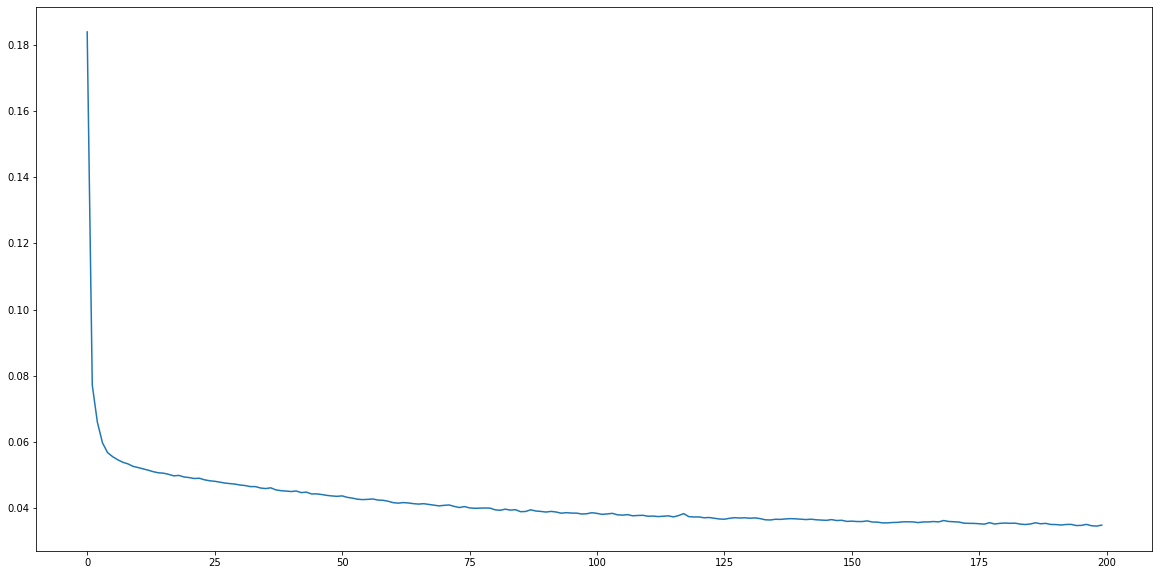

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(AE.model.history.history['loss'])